In [44]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [54]:
src = r'\\kukissd\Kyu_Sync\Aging\data\svs\temp\fb_morp_param'
csvs = [_ for _ in os.listdir(src) if _.endswith('csv')]
dst = os.path.join(src,'tiles')
if not os.path.exists(dst): os.mkdir(dst)

In [46]:
csv = csvs[0]
fn = csv.replace('parameters_','')
fn = fn.replace('.csv','')
if not os.path.exists(os.path.join(dst,fn)): os.mkdir(os.path.join(dst,fn))
img = csv.replace('csv','tif')
img = img.replace('parameters','tissue_region')
mask = img.replace('tissue_region','SF_filtered')

In [47]:
Image.MAX_IMAGE_PIXELS = 999999999
img = Image.open(os.path.join(src,img))
mask = Image.open(os.path.join(src,mask))

In [48]:
df = pd.read_csv(os.path.join(src,csv))
df = df.sort_values(by=['aspect_ratio'])
df

,Unnamed: 0,x,y,area,aspect_ratio,circularity
641,641,18347.0,7101.0,45,2.504,0.685
337,337,9939.0,3990.0,110,2.504,0.648
561,561,24887.0,6143.0,52,2.508,0.610
630,630,21940.0,6948.0,34,2.516,0.559
2,2,27955.0,318.0,56,2.520,0.697
...,...,...,...,...,...,...
23,23,8676.0,961.0,55,7.226,0.349
685,685,20271.0,7901.0,52,7.243,0.403
194,194,12763.0,2819.0,83,7.260,0.354
352,352,4064.0,4189.0,64,7.420,0.341


In [49]:
tiles =[]
masks=[]
for x,y in zip(df['x'],df['y']):
    (l,t,r,b)=(x-30,y-30,x+30,y+30)
    im_crop = img.crop((l,t,r,b))
    mask_crop = mask.crop((l,t,r,b))
    tiles.append(im_crop)
    masks.append(mask_crop)

In [55]:
fn = csv.replace('parameters_','')
fn = fn.replace('.csv','')

In [58]:
if not os.path.exists(os.path.join(dst,fn)): os.mkdir(os.path.join(dst,fn))

In [59]:
for idx,(tile,mask) in enumerate(zip(tiles,masks)):
    tile.save(os.path.join(*[dst,fn,'tile_{:d}.png'.format(idx)]))
    mask.save(os.path.join(*[dst,fn,'mask_{:d}.png'.format(idx)]))

In [50]:
tiles = tiles[0::7]
masks = masks[0::7]

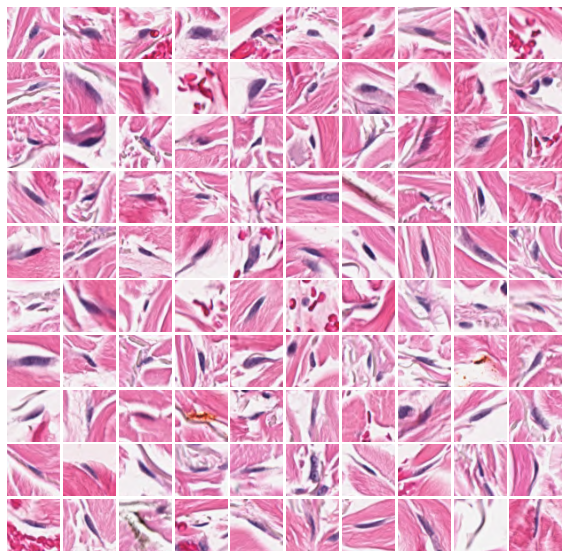

In [51]:
fig,axes = plt.subplots(10,10,figsize=(10,10),sharex=True, sharey=True, squeeze=True)
fig.subplots_adjust(wspace=0,hspace=0.05)
ax = axes.ravel()
for i in range(100):
    ax[i].imshow(np.array(tiles[i]))
    ax[i].axis('off')
fig.savefig('temp.svg')

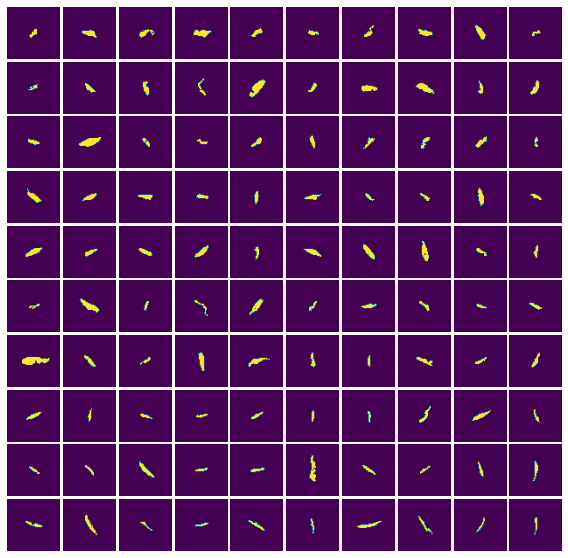

In [52]:
fig2,axes2 = plt.subplots(10,10,figsize=(10,10),sharex=True, sharey=True, squeeze=True)
fig2.subplots_adjust(wspace=0,hspace=0.05)
ax2 = axes2.ravel()
for i in range(100):
    ax2[i].imshow(np.array(masks[i]))
    ax2[i].axis('off')
fig2.savefig('temp2.svg')


In [ ]:
for csv in csvs:
    df = pd.read_csv(os.path.join(src,csv))
    img = csv.replace('csv','tif')
    img = img.replace('parameters','tissue_region')
    img = Image.open(os.path.join(src,img))